In [75]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
x = np.array([1, 2, 3, 4, 5, 6, 7])  #sort x values in ascending order
y = np.array([1, 0.5, 0.1, -0.3, -1.0, -0.5, 0.8]) #corresponding y values

In [86]:
def TDMA(a,b,c,d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

In [87]:
n=len(y)
uu=np.ones(n-2)
dd=4*np.ones(n-2)
ll=uu
#print(uu,dd,ll)
h=1
d=np.zeros(n-2)
for i in range(n-2):
    d[i]=y[i]-2*y[i+1]+y[i+2]
#print(d)
ss=6*d/(h**2)
mp=TDMA(ll,dd,uu,ss)
#print(mp)
mp = np.insert(mp, 0, 0)
mp = np.insert(mp, n-1, 0)
#print(mp)
a=[]
b=[]
c=[]
d=[]
for j in range(n-1):
    t=(mp[j+1]-mp[j])/(6*h)
    a.append(t)
    t=mp[j]/2
    b.append(t)
    t=(y[j+1]-y[j])/h-(mp[j+1]+2*mp[j])*h/6
    c.append(t)
    t=y[j]
    d.append(t)
print(a) #the values of coefficient a for each spline equation
print(b) #the values of coefficient b for each spline equation
print(c) #the values of coefficient c for each spline equation
print(d) #the values of coefficient d for each spline equation

[0.015897435897435905, 0.020512820512820495, -0.19794871794871793, 0.4712820512820512, -0.1871794871794871, -0.1225641025641026]
[0.0, 0.047692307692307714, 0.1092307692307692, -0.48461538461538456, 0.9292307692307691, 0.3676923076923078]
[-0.5158974358974359, -0.4682051282051282, -0.3112820512820513, -0.6866666666666666, -0.242051282051282, 1.054871794871795]
[1.0, 0.5, 0.1, -0.3, -1.0, -0.5]


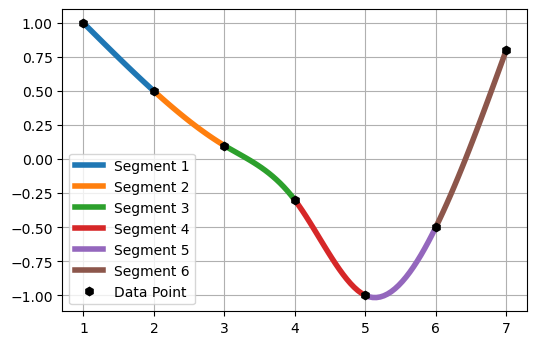

In [95]:
plt.figure(dpi=100)
for k in range(n-1):
    for l in range(20):
        #s=np.ones(20)
        xx=np.linspace(x[k],x[k+1],20)
        s=a[k]*(xx-x[k])**3+b[k]*(xx-x[k])**2+c[k]*(xx-x[k])+d[k]
    plt.plot(xx,s,label='Segment {}'.format(k+1), lw=4)
    #print(s)

plt.grid()

arr = np.arange(np.amin(x), np.amax(x), 0.01)
s = interpolate.CubicSpline(x, y)


plt.plot(x, y, 'kh', label='Data Point')
#plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)
plt.legend()
plt.show()